<a href="https://colab.research.google.com/github/bbd11/AirBnb/blob/main/AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Data science /Airbnb NYC 2019.csv"
df_air=pd.read_csv(path)


In [ ]:
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_air.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df_air.dropna(subset=["host_name"],axis=0,inplace=True)

In [ ]:
df_air.shape

(48874, 16)

In [ ]:
df_air.dropna(subset=["name"],axis=0,inplace=True)

In [ ]:
df_air.shape

(48858, 16)

In [ ]:
df_air['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
df_air['last_review'].fillna("2007-01-01",inplace=True)

In [ ]:
df_air.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
private_room=df_air[df_air["room_type"]=="Private room"]
private_room.shape

(22306, 16)

In [ ]:
room=df_air[df_air["room_type"]!="Private room"]
room.shape

(26552, 16)

In [ ]:
df_air.groupby("neighbourhood")['id'].count().reset_index()


,neighbourhood,id
0,Allerton,42
1,Arden Heights,4
2,Arrochar,21
3,Arverne,77
4,Astoria,900
...,...,...
216,Windsor Terrace,157
217,Woodhaven,88
218,Woodlawn,11
219,Woodrow,1


In [ ]:
man=df_air[df_air['neighbourhood_group']=="Manhattan"]

In [ ]:
man.groupby("neighbourhood")["price"].mean().sort_values().reset_index()

,neighbourhood,price
0,Inwood,88.896825
1,Marble Hill,89.166667
2,Washington Heights,89.665924
3,Roosevelt Island,113.259740
4,Morningside Heights,114.783237
5,Harlem,118.952542
6,Two Bridges,127.069444
7,East Harlem,133.193548
8,Chinatown,161.754768
9,Stuyvesant Town,169.108108


In [ ]:
rooms=df_air.groupby("room_type")["id"].count().reset_index(name="count")


In [ ]:
rooms

,room_type,count
0,Entire home/apt,25393
1,Private room,22306
2,Shared room,1159


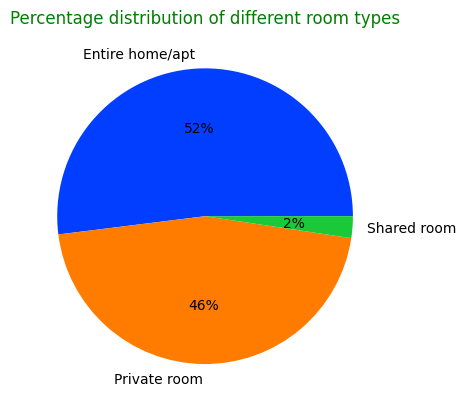

In [ ]:
palette_color = sns.color_palette('bright')
plt.pie(x=rooms['count'],labels=rooms['room_type'],colors=palette_color, autopct='%.0f%%')
plt.title("Percentage distribution of different room types",color="g")
plt.show()

In [ ]:
area=df_air.groupby("neighbourhood_group")["id"].count().reset_index(name="total")
area

,neighbourhood_group,total
0,Bronx,1089
1,Brooklyn,20089
2,Manhattan,21643
3,Queens,5664
4,Staten Island,373


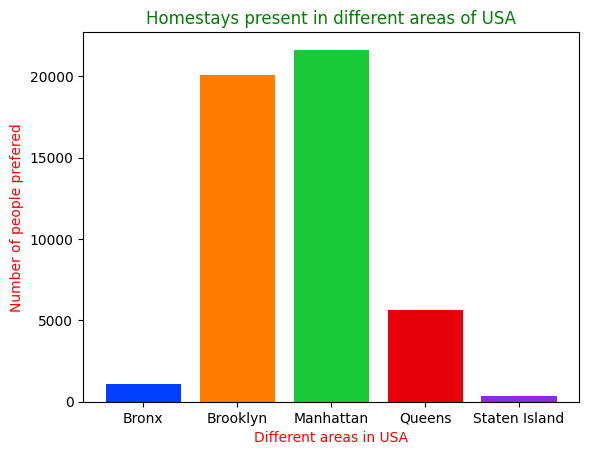

In [ ]:
palette_color = sns.color_palette('bright')
plt.bar(area["neighbourhood_group"],area["total"],color=palette_color)
plt.xlabel("Different areas in USA",color="r",alpha=1)
plt.ylabel("Number of people prefered",color="r",alpha=1)
plt.title("Homestays present in different areas of USA",color="g")
plt.show()


In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2007-01-01,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
def home_type(reviews):
  if reviews>100:
    return "Excellent"
  elif reviews<100 and reviews>50:
    return "Good"
  else:
    return "Avg"
df_air["remark"]=df_air.apply(lambda x:home_type(x['number_of_reviews']),axis=1)
df_air["remark"].head()

0          Avg
1          Avg
2          Avg
3    Excellent
4          Avg
Name: remark, dtype: object

In [ ]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,remark
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Avg
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Avg
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2007-01-01,0.00,1,365,Avg
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Excellent
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Avg


In [ ]:
homes=df_air.groupby("remark")["id"].count().reset_index(name="no of homes")
homes


,remark,no of homes
0,Avg,41954
1,Excellent,2992
2,Good,3912


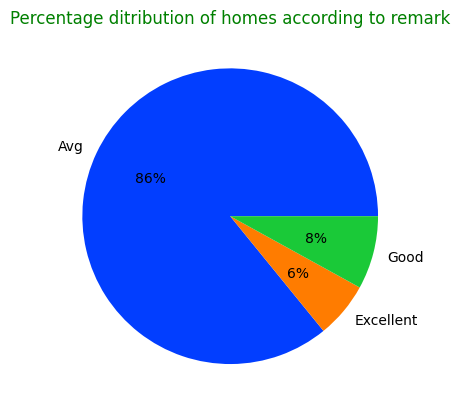

In [ ]:
my_color = sns.color_palette('bright')
plt.pie(data=homes,x="no of homes",labels="remark",colors=my_color,autopct='%.0f%%' )
plt.title("Percentage ditribution of homes according to remark",color="g")
plt.show()

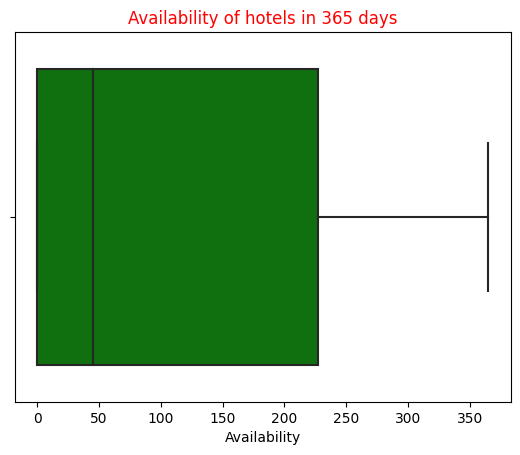

In [ ]:
sns.boxplot(data=df_air,x="availability_365",color="g")
plt.xlabel('Availability')
plt.title("Availability of hotels in 365 days",color="r")
plt.show()

In [ ]:
def demand(availbility):
  if availbility>200:
    return "Low"
  elif availbility<200 and availbility>100:
    return "Medium"
  elif availbility<100 and availbility>50:
    return "High"
  else:
    return "Very High"


In [ ]:
df_air["demand"]=df_air['availability_365'].apply(demand)
df_air.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,remark,demand
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Avg,Low


In [ ]:
df_demand=df_air.groupby(['neighbourhood_group',"demand"])["price"].mean().reset_index(name="price_mean")
df_demand

,neighbourhood_group,demand,price_mean
0,Bronx,High,80.473988
1,Bronx,Low,93.279518
2,Bronx,Medium,92.448454
3,Bronx,Very High,80.410423
4,Brooklyn,High,127.148311
5,Brooklyn,Low,139.984693
6,Brooklyn,Medium,135.311243
7,Brooklyn,Very High,115.057354
8,Manhattan,High,203.103352
9,Manhattan,Low,243.041812


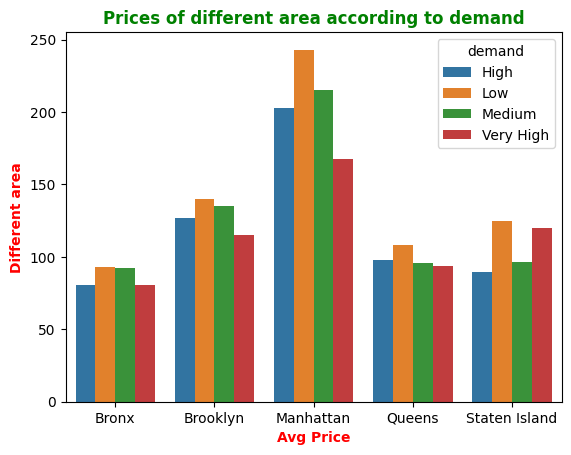

In [ ]:
sns.barplot(data=df_demand,x='neighbourhood_group',y='price_mean',hue="demand")
plt.xlabel("Avg Price",weight="bold",color="r")
plt.ylabel("Different area",weight="bold",color="r")
plt.title("Prices of different area according to demand",weight="bold",color="g")
plt.show()

In [ ]:
area_price=df_air.groupby(["neighbourhood_group","remark"])["price"].mean().reset_index(name="avg_price")
area_price

,neighbourhood_group,remark,avg_price
0,Bronx,Avg,89.787445
1,Bronx,Excellent,69.426471
2,Bronx,Good,79.699115
3,Brooklyn,Avg,124.946632
4,Brooklyn,Excellent,121.765376
5,Brooklyn,Good,121.036839
6,Manhattan,Avg,202.506670
7,Manhattan,Excellent,148.461857
8,Manhattan,Good,164.312500
9,Queens,Avg,102.132397


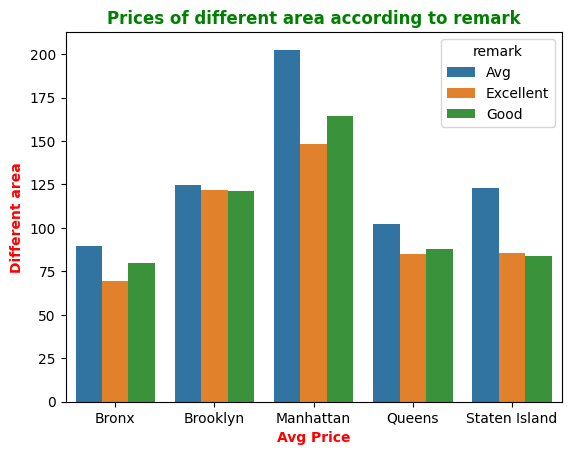

In [ ]:
sns.barplot(data=area_price,x='neighbourhood_group',y='avg_price',hue="remark")
plt.xlabel("Avg Price",weight="bold",color="r")
plt.ylabel("Different area",weight="bold",color="r")
plt.title("Prices of different area according to remark",weight="bold",color="g")
plt.show()

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'remark', 'demand'],
      dtype='object')

In [ ]:
df_manhattan=df_air[df_air['neighbourhood_group']=="Manhattan"]
df_mh=df_manhattan.groupby(["neighbourhood","remark","demand"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"sum"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_mh.head()

,neighbourhood,remark,demand,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Nolita,Good,Low,1002.500000,2.750000,79.500000,1081
1,Battery Park City,Avg,Low,854.375000,24.437500,0.500000,5403
2,Tribeca,Avg,Low,722.792453,22.754717,4.641509,16552
3,Flatiron District,Avg,Medium,602.000000,7.000000,15.142857,1115
4,Tribeca,Excellent,Low,575.000000,1.000000,447.000000,207


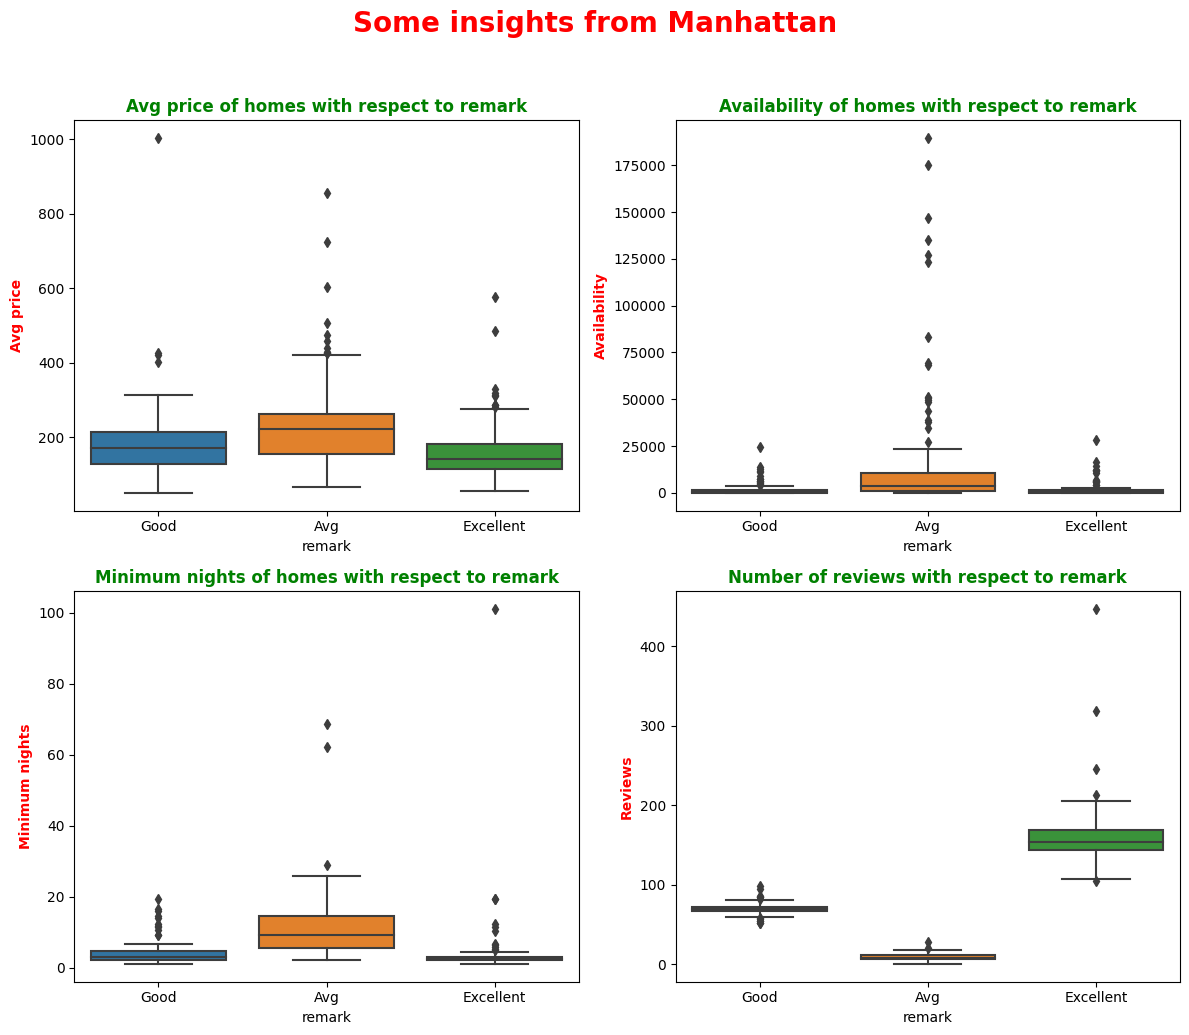

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.suptitle("Some insights from Manhattan", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_mh,x="remark",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_mh,x="remark",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_mh,x="remark",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_mh,x="remark",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

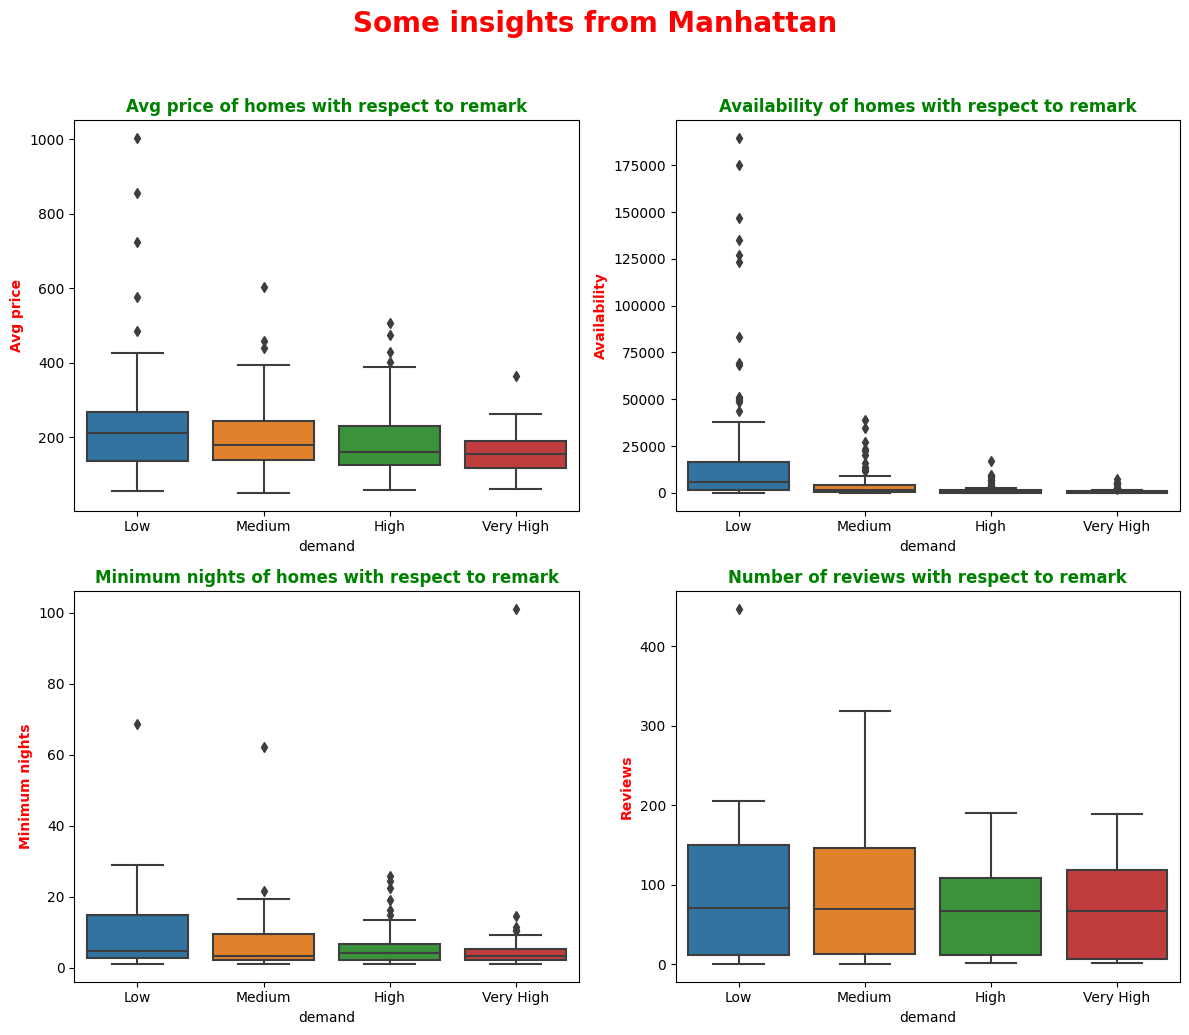

In [ ]:
fig=plt.figure(figsize=(12,10))
plt.suptitle("Some insights from Manhattan", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_mh,x="demand",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_mh,x="demand",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_mh,x="demand",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_mh,x="demand",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
df_bronx=df_air[df_air['neighbourhood_group']=="Bronx"]
df_bx=df_bronx.groupby(["neighbourhood","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"sum"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_bx.head()

,neighbourhood,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Riverdale,Avg,516.444444,6.222222,1.333333,1502
1,City Island,Avg,199.846154,2.076923,15.076923,1995
2,Spuyten Duyvil,Avg,154.750000,48.250000,17.500000,1080
3,Riverdale,Good,150.000000,2.000000,79.000000,267
4,Melrose,Good,150.000000,5.000000,58.000000,37


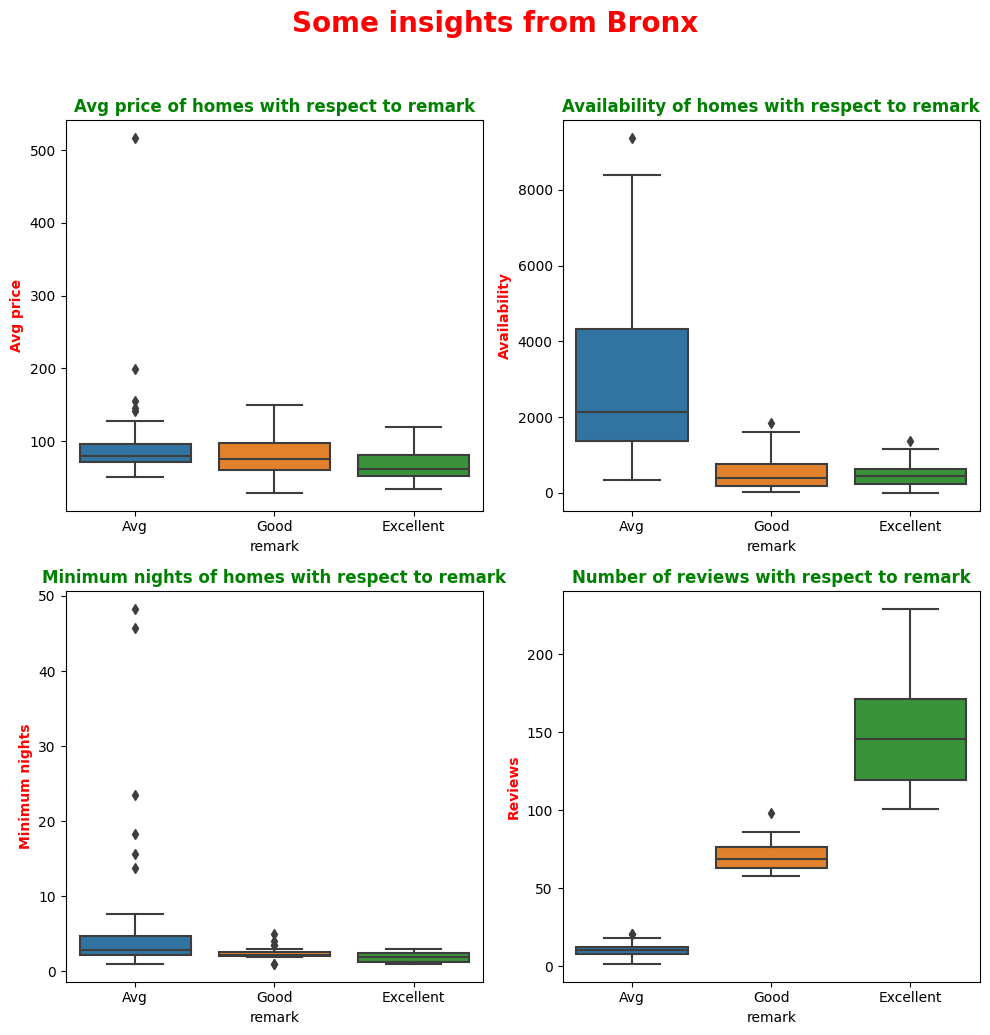

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Bronx", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_bx,x="remark",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_bx,x="remark",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_bx,x="remark",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_bx,x="remark",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
df_brooklyn=df_air[df_air['neighbourhood_group']=="Brooklyn"]
df_bl=df_brooklyn.groupby(["neighbourhood","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"sum"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_bl.head()

,neighbourhood,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Sea Gate,Avg,487.857143,4.142857,1.428571,459
1,Cobble Hill,Avg,224.130952,8.202381,11.059524,3612
2,Navy Yard,Good,215.000000,4.000000,99.000000,0
3,Brooklyn Heights,Avg,210.889706,7.977941,7.338235,7297
4,DUMBO,Avg,207.107143,9.285714,6.714286,2785


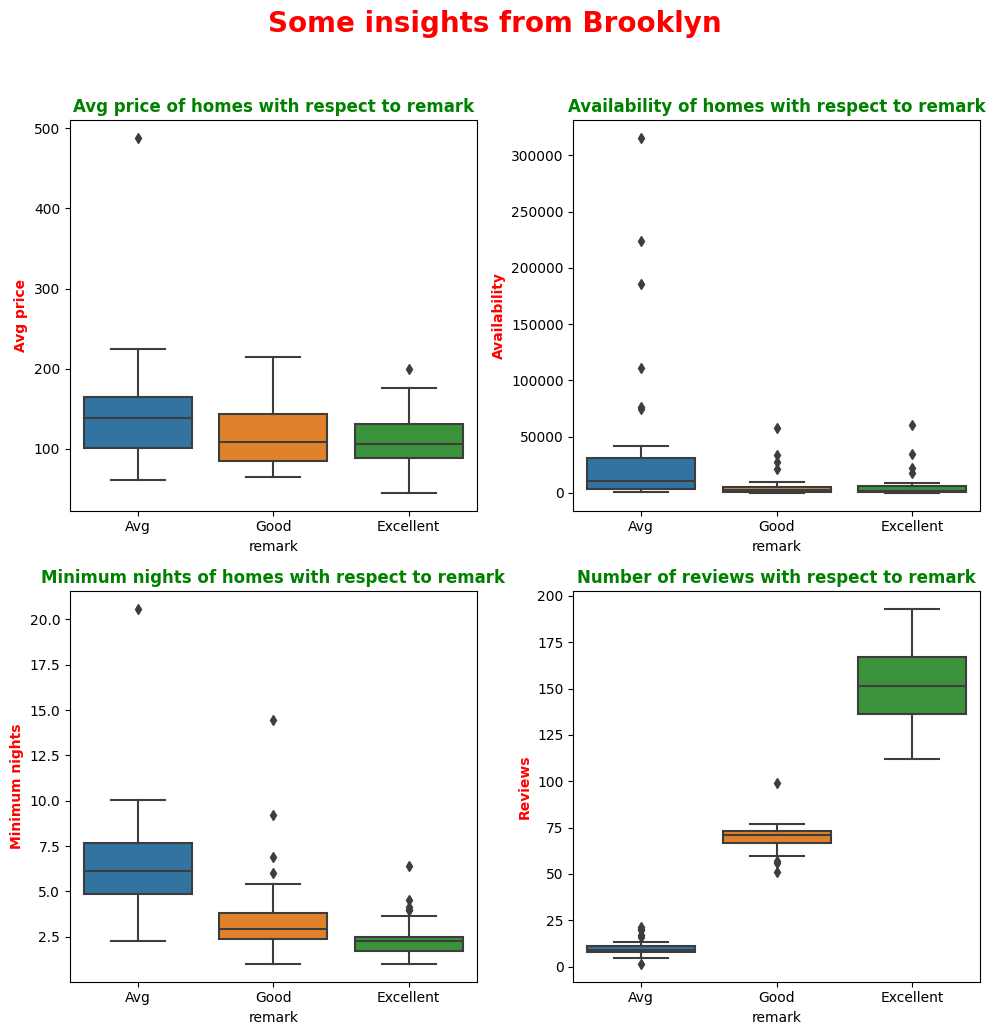

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Brooklyn", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_bl,x="remark",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_bl,x="remark",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_bl,x="remark",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_bl,x="remark",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
df_queens=df_air[df_air['neighbourhood_group']=="Queens"]
df_qu=df_queens.groupby(["neighbourhood","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"sum"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_qu.head()

,neighbourhood,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Neponsit,Avg,274.666667,2.000000,15.333333,693
1,Jamaica Estates,Good,241.500000,2.500000,71.500000,421
2,Forest Hills,Excellent,232.285714,2.142857,132.428571,1577
3,Breezy Point,Avg,213.333333,1.000000,1.666667,301
4,Arverne,Avg,189.650000,1.733333,13.583333,10872


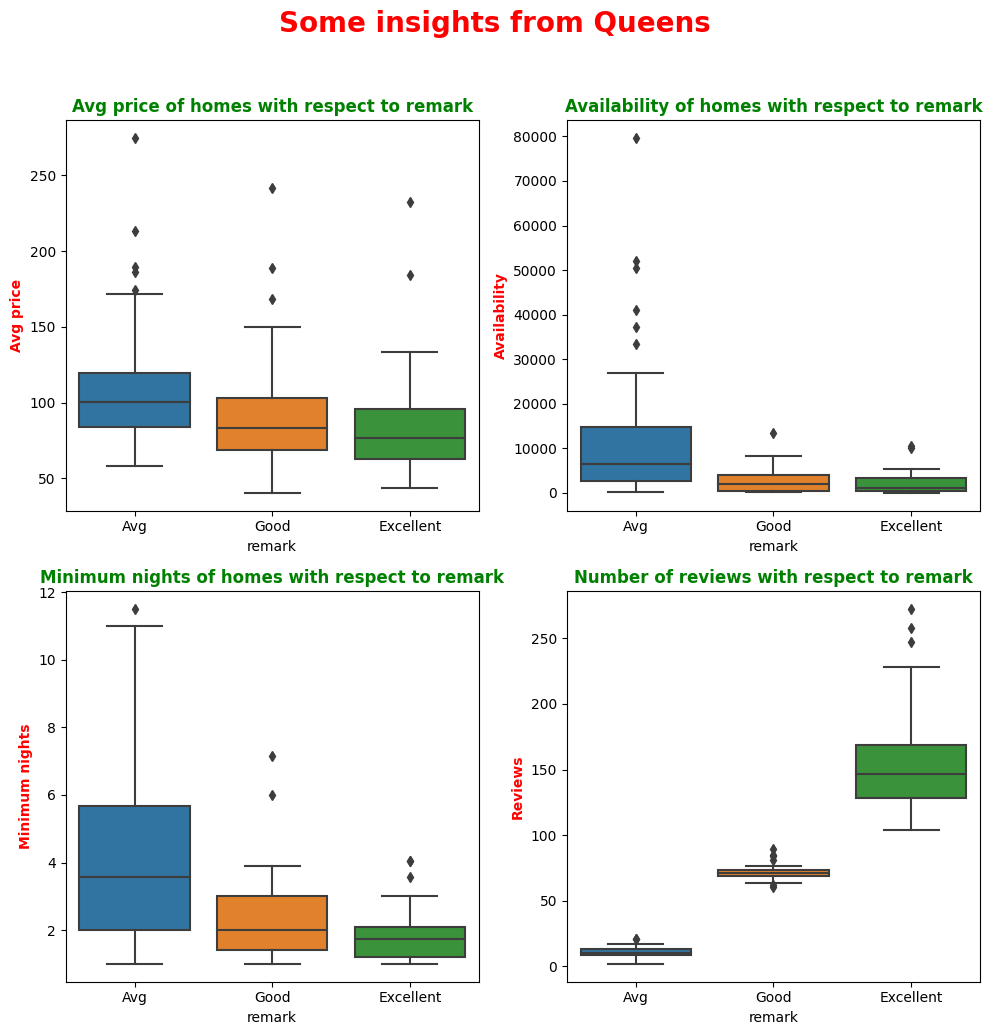

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Queens", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_qu,x="remark",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_qu,x="remark",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_qu,x="remark",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_qu,x="remark",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
df_staten_island=df_air[df_air['neighbourhood_group']=="Staten Island"]
df_is=df_staten_island.groupby(["neighbourhood","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"sum"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_is.head()

,neighbourhood,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Fort Wadsworth,Avg,800.0,7.000000,0.000000,365
1,Woodrow,Avg,700.0,7.000000,0.000000,0
2,Prince's Bay,Avg,409.5,4.750000,5.750000,442
3,Randall Manor,Avg,350.5,2.611111,11.722222,4919
4,Eltingville,Avg,299.0,10.000000,0.000000,30


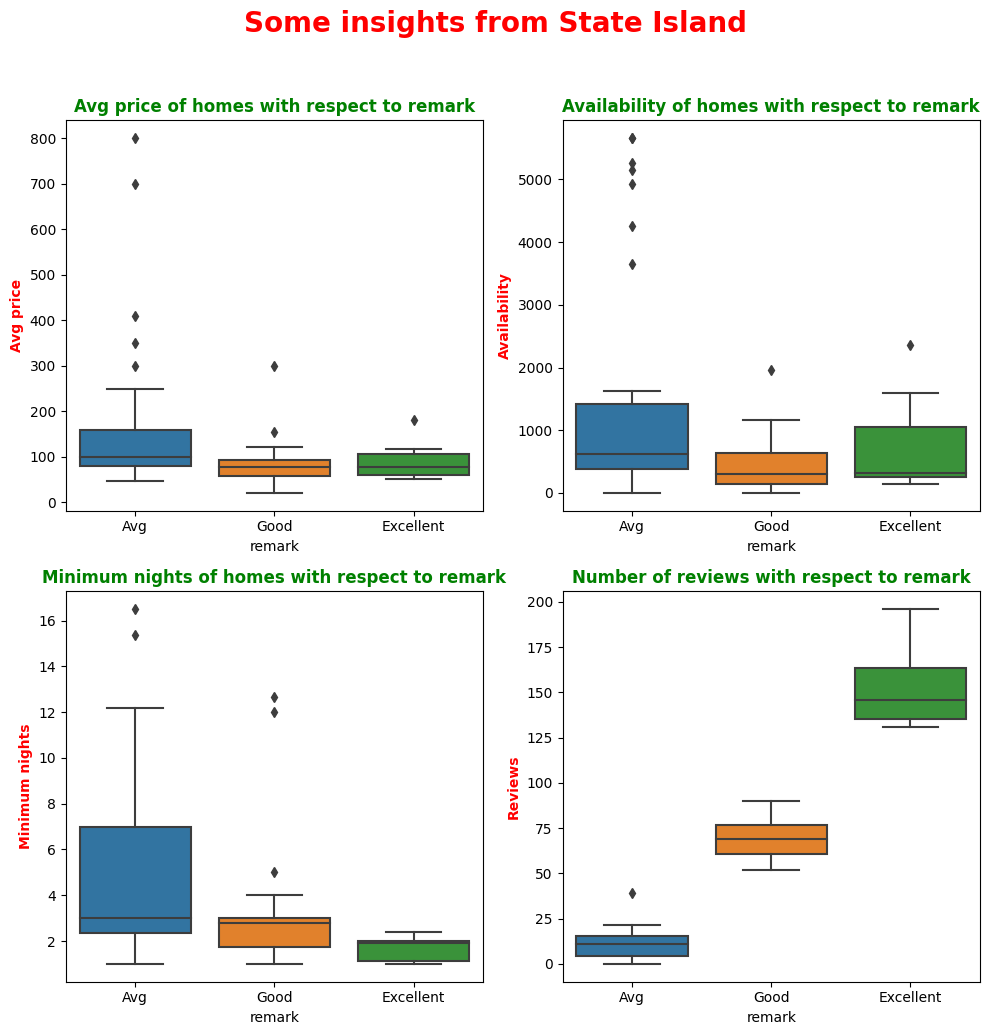

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from State Island", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.boxplot(data=df_is,x="remark",y='avg_price')
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.boxplot(data=df_is,x="remark",y='availability_365')
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.boxplot(data=df_is,x="remark",y='avg_minimum_nights')
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.boxplot(data=df_is,x="remark",y='avg_number_of_reviews')
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

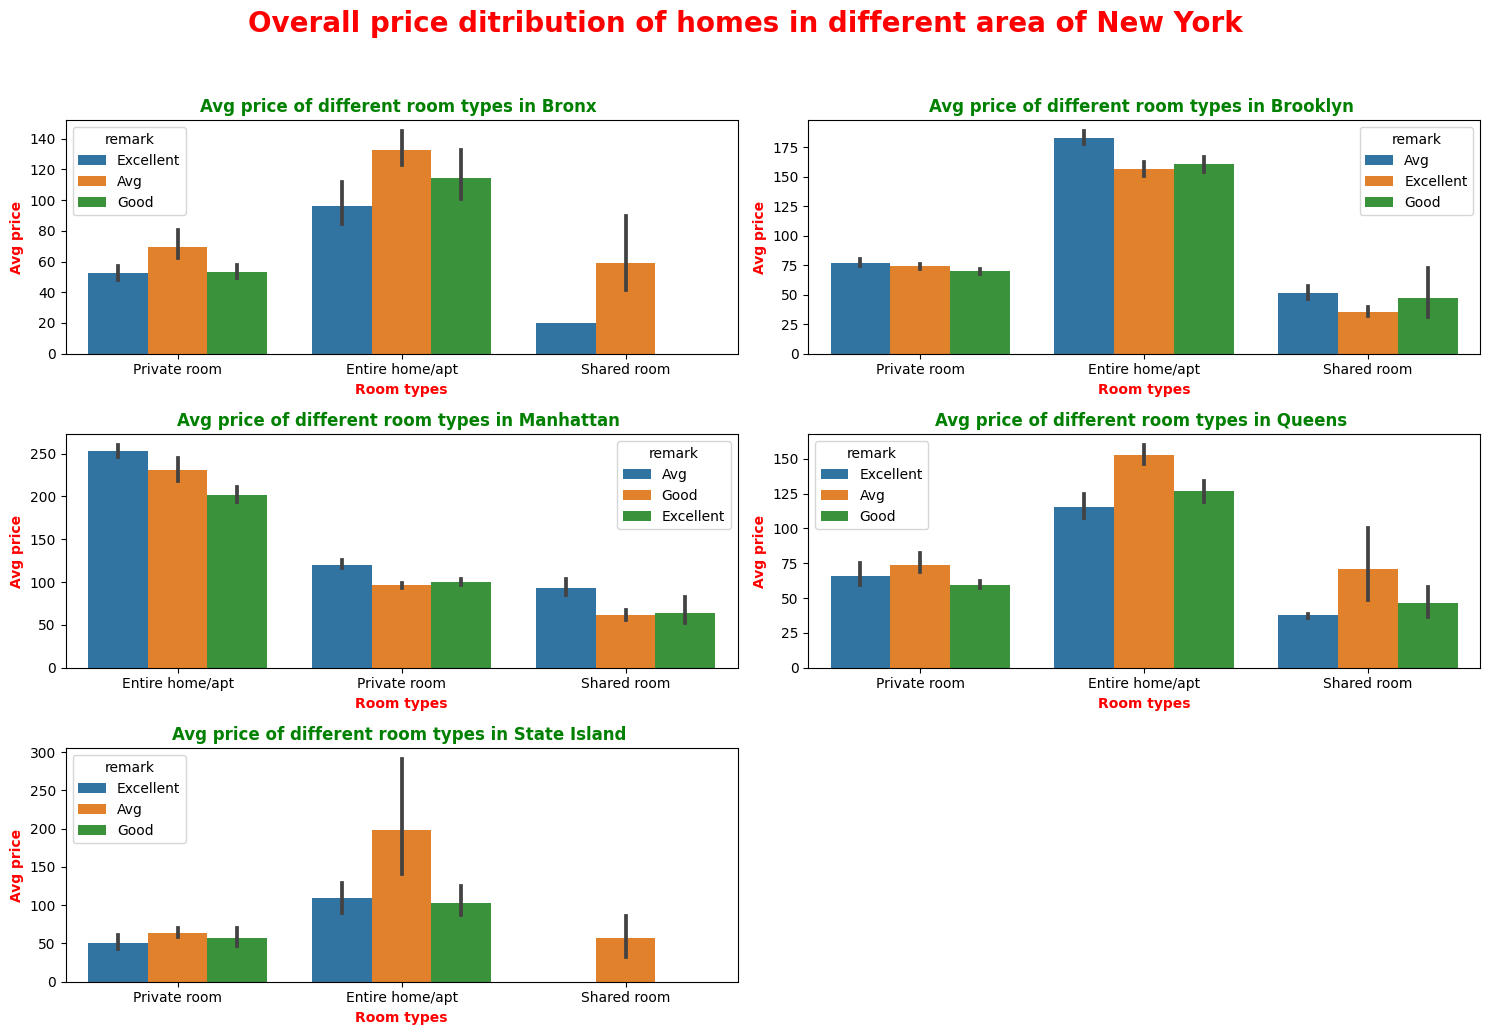

In [ ]:
fig=plt.figure(figsize=(15,10))
plt.suptitle("Overall price ditribution of homes in different area of New York", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(3,2,1)
sns.barplot(data=df_bronx,x=df_bronx['room_type'],y=df_bronx['price'],hue="remark")
plt.xlabel("Room types",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of different room types in Bronx ",weight="bold",color="g")
plt.subplot(3,2,2)
sns.barplot(data=df_brooklyn,x='room_type',y='price',hue="remark")
plt.xlabel("Room types",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of different room types in Brooklyn ",weight="bold",color="g")
plt.subplot(3,2,3)
sns.barplot(data=df_manhattan,x='room_type',y='price',hue="remark")
plt.xlabel("Room types",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of different room types in Manhattan ",weight="bold",color="g")
plt.subplot(3,2,4)
sns.barplot(data=df_queens,x='room_type',y='price',hue="remark")
plt.xlabel("Room types",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of different room types in Queens ",weight="bold",color="g")
plt.subplot(3,2,5)
sns.barplot(data=df_staten_island,x='room_type',y='price',hue="remark")
plt.xlabel("Room types",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of different room types in State Island ",weight="bold",color="g")
plt.tight_layout()
plt.show()


In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'remark', 'demand'],
      dtype='object')

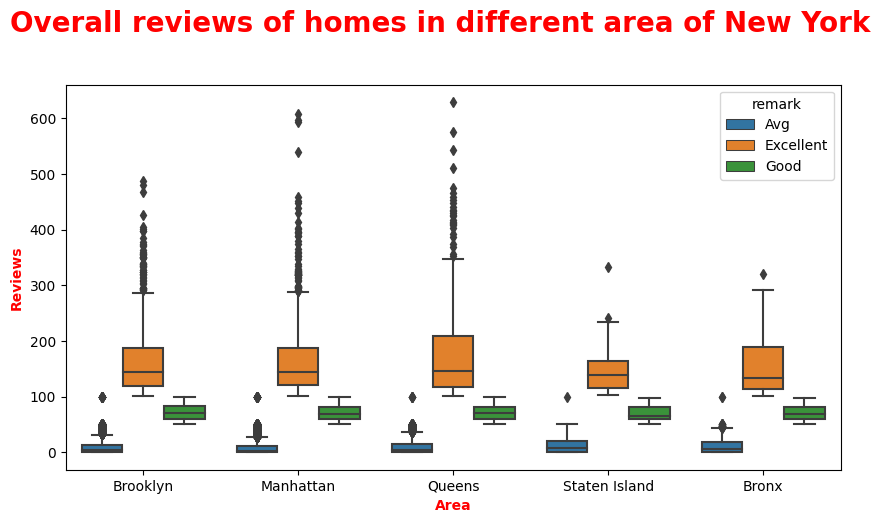

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.suptitle("Overall reviews of homes in different area of New York", y=1.03,fontsize=20,color="r",weight="bold")
sns.boxplot(data=df_air,x="neighbourhood_group",y='number_of_reviews',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Reviews",weight="bold",color="r")

plt.show()

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'remark', 'demand'],
      dtype='object')

In [ ]:
df_air["last_review"]=pd.to_datetime(df_air["last_review"])

In [ ]:
df_air["last_review"].head(2)

0   2018-10-19
1   2019-05-21
Name: last_review, dtype: datetime64[ns]

In [ ]:
least_visited = df_air[(df_air['last_review'].dt.year < 2015) & (df_air['last_review'].dt.year > 2008)]
df_least=least_visited.groupby(["neighbourhood_group","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"mean"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_least.head()

,neighbourhood_group,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Manhattan,Avg,234.911290,21.193548,4.379032,86.298387
1,Manhattan,Good,144.666667,1.333333,61.000000,116.000000
2,Brooklyn,Avg,137.580645,13.314516,4.661290,80.532258
3,Queens,Avg,100.720000,8.640000,3.840000,93.800000
4,Staten Island,Avg,75.000000,1.000000,1.000000,0.000000


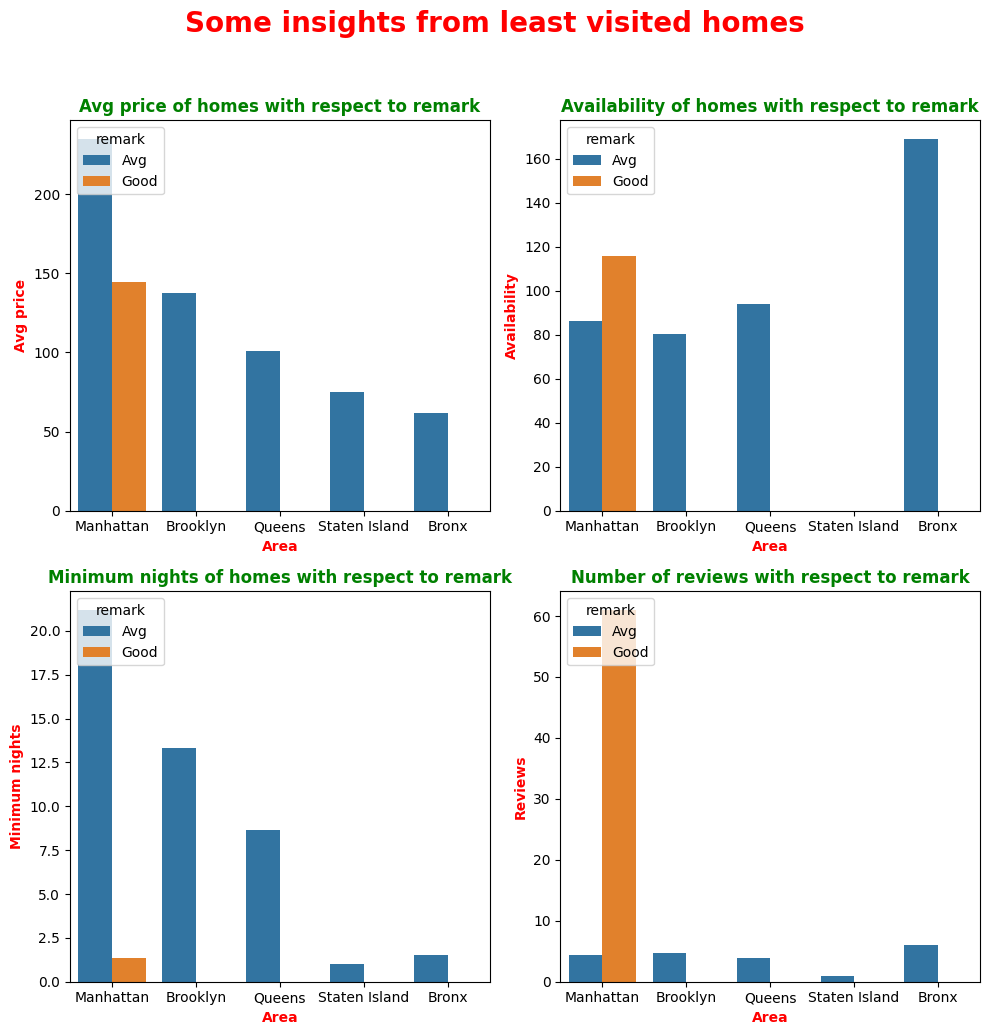

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from least visited homes", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.barplot(data=df_least,x="neighbourhood_group",y='avg_price',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.barplot(data=df_least,x="neighbourhood_group",y='availability_365',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.barplot(data=df_least,x="neighbourhood_group",y='avg_minimum_nights',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.barplot(data=df_least,x="neighbourhood_group",y='avg_number_of_reviews',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
not_visited=df_air[(df_air['last_review'].dt.year==2007)& (df_air["reviews_per_month"]==0.0)]
df_not=not_visited.groupby(["neighbourhood_group","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"mean"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_not.head()

,neighbourhood_group,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Manhattan,Avg,252.585026,13.584429,0.0,120.861211
1,Staten Island,Avg,247.050847,12.338983,0.0,167.949153
2,Brooklyn,Avg,137.684384,9.379452,0.0,74.960000
3,Bronx,Avg,119.813084,7.149533,0.0,143.616822
4,Queens,Avg,115.246337,9.204212,0.0,119.083333


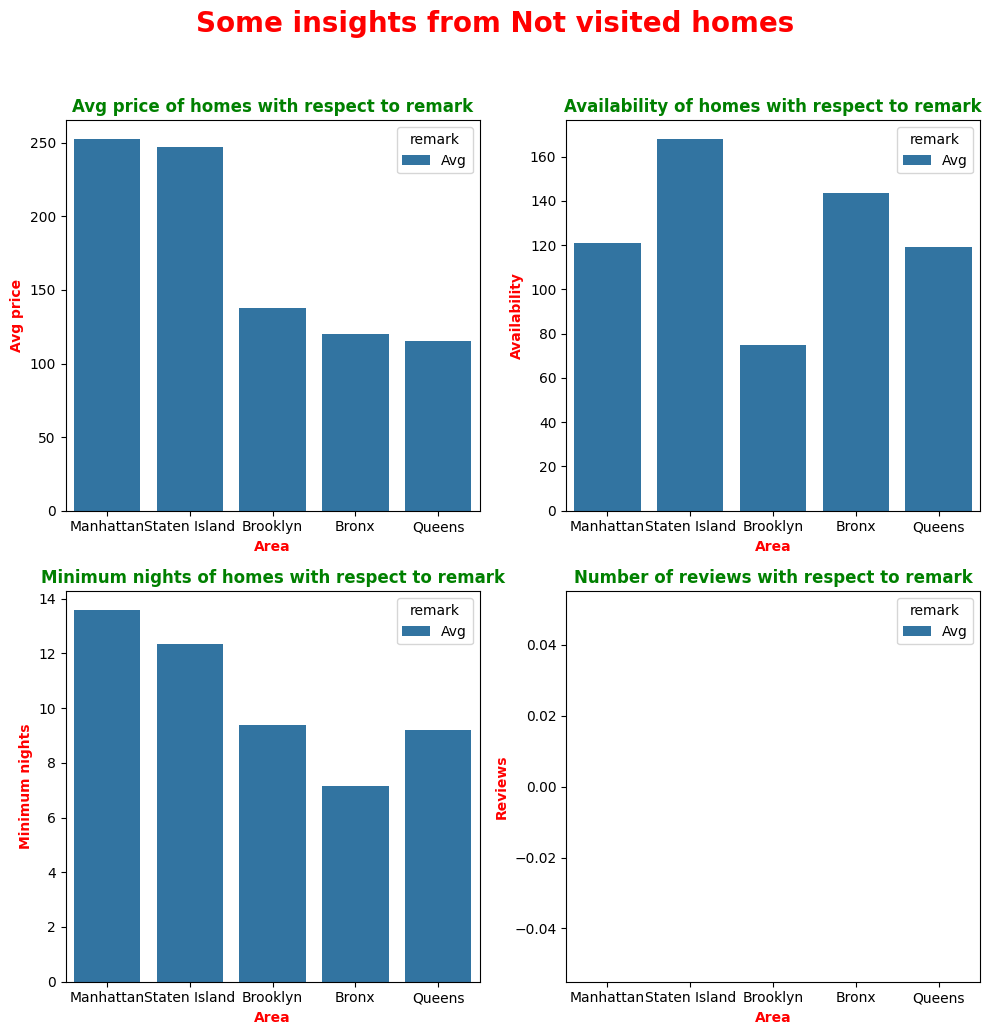

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Not visited homes", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.barplot(data=df_not,x="neighbourhood_group",y='avg_price',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.barplot(data=df_not,x="neighbourhood_group",y='availability_365',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.barplot(data=df_not,x="neighbourhood_group",y='avg_minimum_nights',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.barplot(data=df_not,x="neighbourhood_group",y='avg_number_of_reviews',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
latest_visited=df_air[df_air['last_review'].dt.year==2019]

df_latest=latest_visited.groupby(["neighbourhood_group","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"mean"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_latest.head()

,neighbourhood_group,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Manhattan,Avg,192.595753,6.743764,14.217347,134.759115
1,Manhattan,Good,164.650485,4.093353,70.759522,144.365945
2,Manhattan,Excellent,148.641136,2.878657,164.686747,172.962995
3,Brooklyn,Good,122.307001,3.300578,71.418112,159.955684
4,Brooklyn,Excellent,121.954723,2.953942,161.138173,181.973458


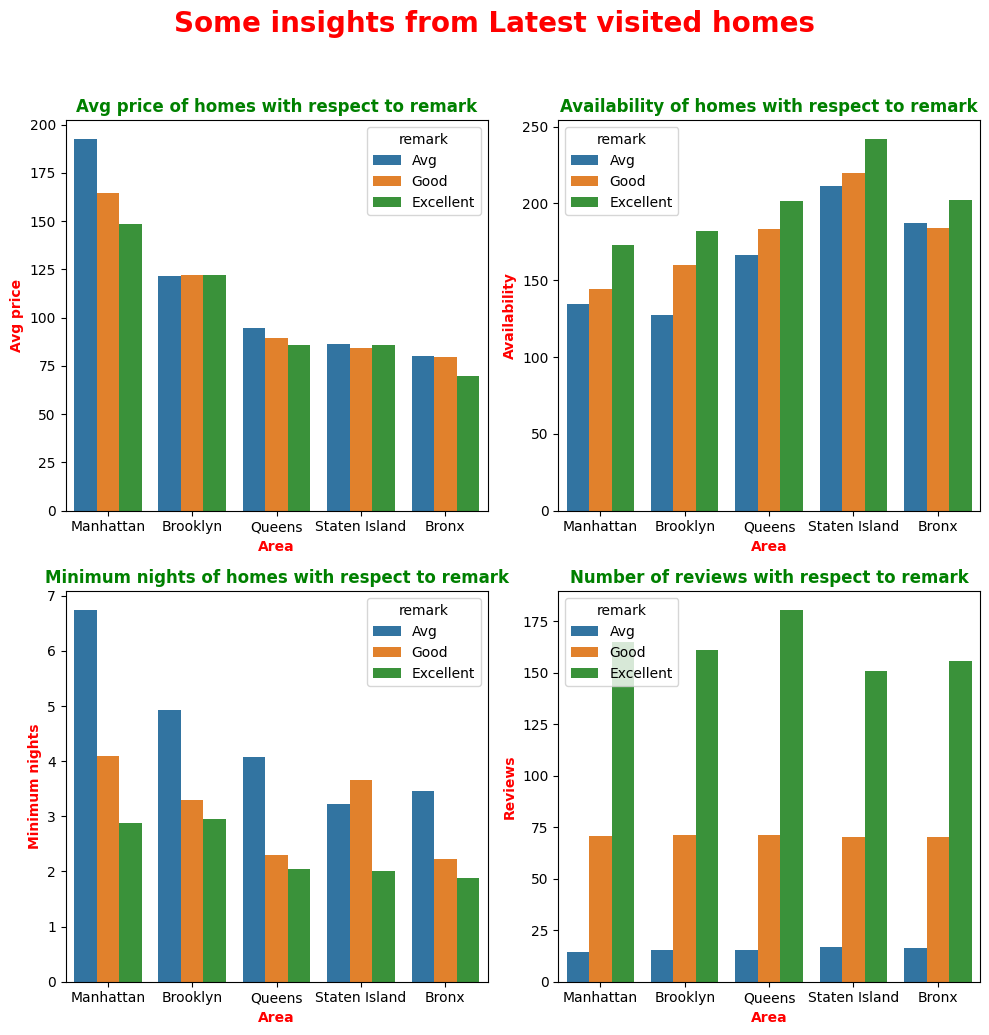

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Latest visited homes", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.barplot(data=df_latest,x="neighbourhood_group",y='avg_price',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.barplot(data=df_latest,x="neighbourhood_group",y='availability_365',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.barplot(data=df_latest,x="neighbourhood_group",y='avg_minimum_nights',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.barplot(data=df_latest,x="neighbourhood_group",y='avg_number_of_reviews',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

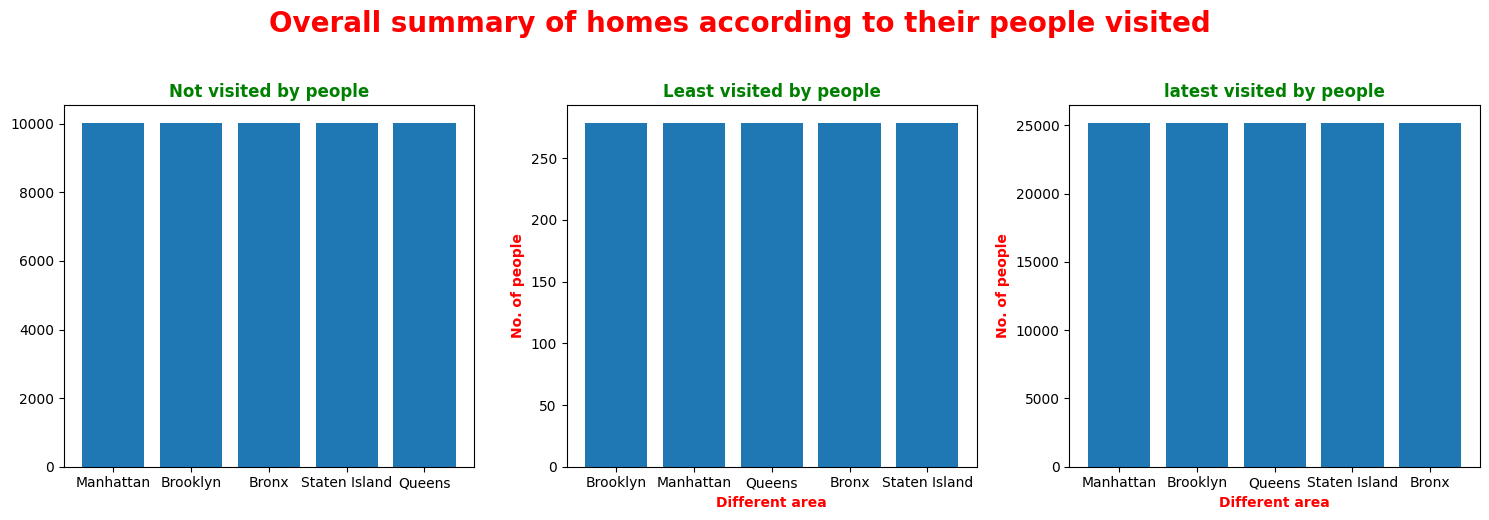

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.suptitle("Overall summary of homes according to their people visited ", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(1,3,1)
plt.bar(not_visited['neighbourhood_group'],not_visited['id'].count())
# plt.xlabel("Different area",weight="bold",color="r")
# plt.ylabel("No. of people",weight="bold",color="r")
plt.title("Not visited by people",weight="bold",color="g")

plt.subplot(1,3,2)
plt.bar(least_visited['neighbourhood_group'],least_visited['id'].count())
plt.xlabel("Different area",weight="bold",color="r")
plt.ylabel("No. of people",weight="bold",color="r")
plt.title("Least visited by people",weight="bold",color="g")

plt.subplot(1,3,3)
plt.bar(latest_visited['neighbourhood_group'],latest_visited['id'].count())
plt.xlabel("Different area",weight="bold",color="r")
plt.ylabel("No. of people",weight="bold",color="r")
plt.title("latest visited by people",weight="bold",color="g")
plt.tight_layout()
plt.show()

In [ ]:
most_visited=df_air[(df_air['last_review'].dt.year>2016) & (df_air["reviews_per_month"]>5)]
df_most=most_visited.groupby(["neighbourhood_group","remark"],as_index=True).agg({"price":"mean",'minimum_nights':"mean",'number_of_reviews':"mean",'availability_365':"mean"}).sort_values(by="price",ascending=False).rename(columns={"price":"avg_price",'number_of_reviews':"avg_number_of_reviews",'minimum_nights':'avg_minimum_nights'}).reset_index()
df_most.head()

,neighbourhood_group,remark,avg_price,avg_minimum_nights,avg_number_of_reviews,availability_365
0,Manhattan,Avg,180.569288,1.670412,21.531835,133.610487
1,Brooklyn,Avg,138.149533,1.476636,22.373832,121.172897
2,Manhattan,Good,137.955357,1.437500,69.321429,119.366071
3,Manhattan,Excellent,130.556818,1.795455,198.619318,150.562500
4,Brooklyn,Good,98.809917,1.958678,71.834711,114.099174


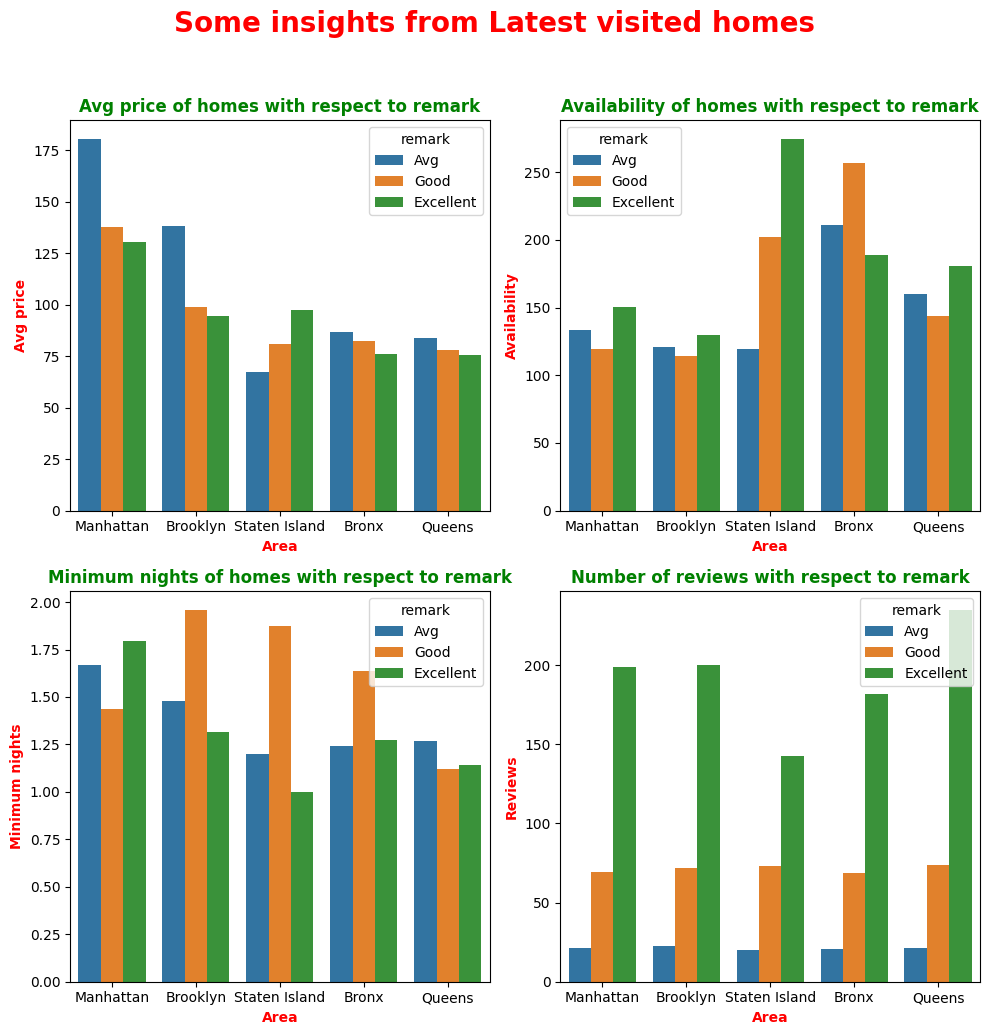

In [ ]:
fig=plt.figure(figsize=(10,10))
plt.suptitle("Some insights from Latest visited homes", y=1.03,fontsize=20,color="r",weight="bold")
plt.subplot(2,2,1)
sns.barplot(data=df_most,x="neighbourhood_group",y='avg_price',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Avg price",weight="bold",color="r")
plt.title("Avg price of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,2)
sns.barplot(data=df_most,x="neighbourhood_group",y='availability_365',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Availability",weight="bold",color="r")
plt.title("Availability of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,3)
sns.barplot(data=df_most,x="neighbourhood_group",y='avg_minimum_nights',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Minimum nights",weight="bold",color="r")
plt.title("Minimum nights of homes with respect to remark",weight="bold",color="g")

plt.subplot(2,2,4)
sns.barplot(data=df_most,x="neighbourhood_group",y='avg_number_of_reviews',hue="remark")
plt.xlabel("Area",weight="bold",color="r")
plt.ylabel("Reviews",weight="bold",color="r")
plt.title("Number of reviews with respect to remark",weight="bold",color="g")
plt.tight_layout()
plt.show()

<ipython-input-105-748e1e1fbcc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_most.corr()


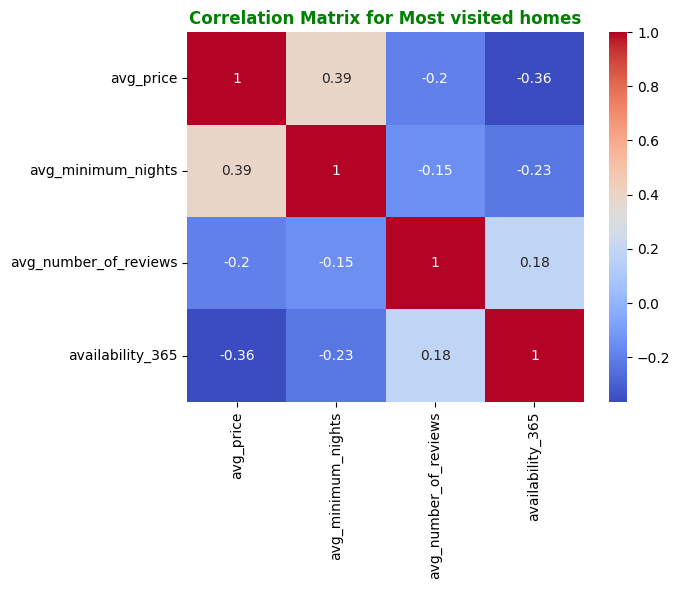

In [ ]:
corr_matrix = df_most.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Most visited homes',weight="bold",color="g")
plt.show()

In [ ]:
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'remark', 'demand'],
      dtype='object')